# Central Limit Theorem

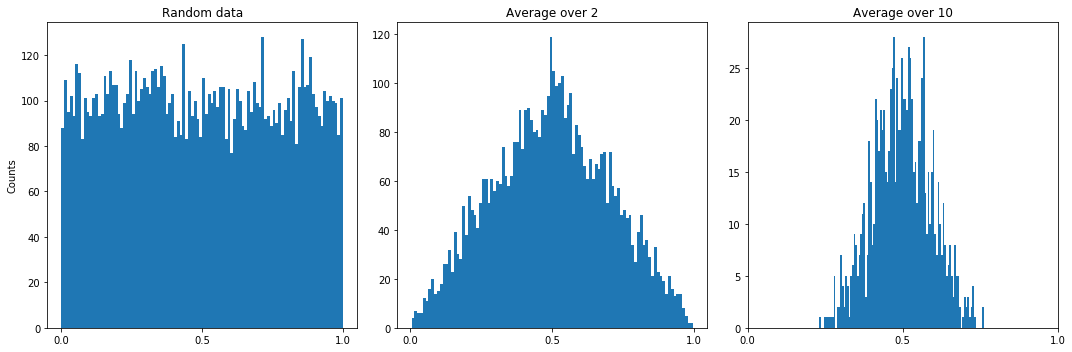

In [1]:
''' Practical demonstration of the central limit theorem, based on the uniform distribution '''

# Copyright(c) 2015, Thomas Haslwanter. All rights reserved, under the CC BY-SA 4.0 International License

# Import standard packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline
def showAsHistogram(axis, data, title):
    '''
    Subroutine showing a histogram and formatting it
    '''
    nbins = 100
    axis.hist( data, bins=nbins)
    axis.set_xticks([0, 0.5, 1])
    axis.set_title(title)

def main():
    '''
    Demonstrate central limit theorem.
    '''
    plot_pic_width = 15
    plot_pic_height = 5
    ndata = 10000
    data = np.random.random(ndata)
    # Show three histograms, side-by-side
    fig, axs = plt.subplots(1,3, figsize=(plot_pic_width,plot_pic_height))
 
    showAsHistogram(axs[0], data, 'Random data')
    showAsHistogram(axs[1], np.mean(data.reshape((ndata//2, 2 )), axis=1), 'Average over 2')
    showAsHistogram(axs[2], np.mean(data.reshape((ndata//10,10)), axis=1), 'Average over 10')   
    # Format them and show them
    axs[0].set_ylabel('Counts')
    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    main()

# Standard Error

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
import scipy.stats as stat

plot_pic_width = 15
plot_pic_height = 5

In [3]:
def drawPlot(data, sample = 1, c = 'r', normal = False):
    """
    """    
    nbin = int(math.sqrt(len(data)))
    plot_pic_width = 20
    plot_pic_height = 5
    fig, axs = plt.subplots(1,2, figsize=(plot_pic_width,plot_pic_height))
    
    if (sample > 1):
        mean = np.mean(data, axis=1)
        stdev = np.std(mean)
        xbar_mean = np.mean(mean)
        xbar_stdev = np.std(mean)
        xbar_kurto = stat.kurtosis(mean)
        xbar_skewness = stat.skew(mean)
        axs[0].plot(np.mean(data,axis=1), color=c, marker='o', linestyle='')
        axs[1].hist(np.mean(data,axis=1), nbin, facecolor=c)
    else:
        xbar_mean = mean = np.mean(data)
        xbar_stdev = stdev = np.std(data)
        xbar_kurto = stat.kurtosis(data)
        xbar_skewness = stat.skew(data)
        axs[0].plot(data, color=c, marker='o', linestyle='')
        axs[1].hist(data, nbin, facecolor=c)

    if (normal == True):
        # bolow code for using normal distribution only
        linecolor = ['r','g','b','y']
        for rate in range(1,4):
            axs[0].axhline(y=xbar_mean, color='k', linewidth=2)
            axs[0].axhline(y=xbar_mean+xbar_stdev*rate, color=linecolor[rate-1], linewidth=1)
            axs[0].axhline(y=xbar_mean-xbar_stdev*rate, color=linecolor[rate-1], linewidth=1)
            axs[1].axvline(x=xbar_mean, color='k', linewidth=2)
            axs[1].axvline(x=xbar_mean+xbar_stdev*rate, color=linecolor[rate-1], linewidth=1)
            axs[1].axvline(x=xbar_mean-xbar_stdev*rate, color=linecolor[rate-1], linewidth=1)
            
    print('sample size:', sample, ', mean:', xbar_mean, ', stddev:', xbar_stdev, ', skewness:', xbar_skewness, ', kurtosis:', xbar_kurto )
    plt.tight_layout()
    plt.show()

sample size: 1 , mean: 0.4993617858755874 , stddev: 0.2886116666649626 , skewness: 0.004430449727455284 , kurtosis: -1.1991553686386673


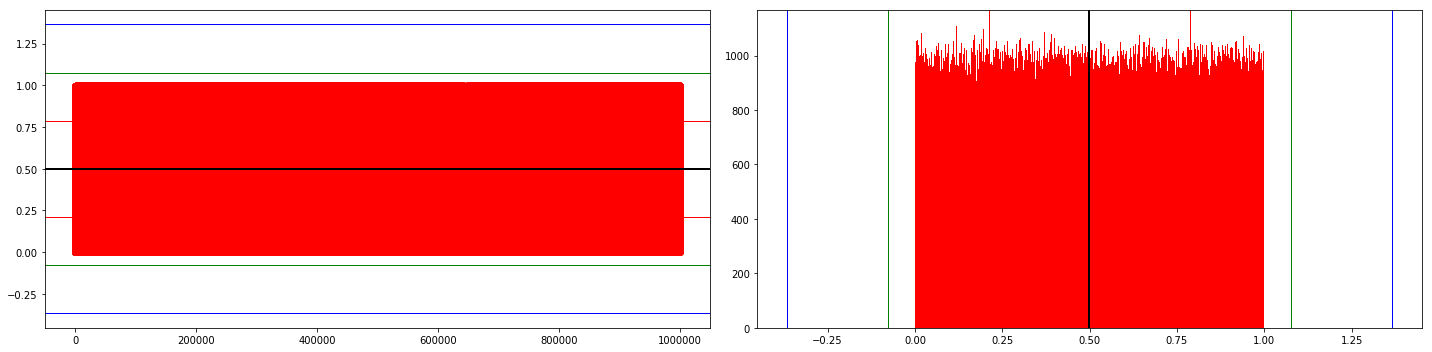

In [4]:
datatype = 1
ndata = 1000000
data = 0
if (datatype==1):
    # uniform
    data = np.random.rand(ndata)
elif (datatype==2):
    # beta
    data = np.random.beta(0.5, 2, ndata)
else:
    # normal
    data = np.random.normal(100, 10, ndata)

# reference data
drawPlot(data=data, normal = True)

sample size: 2 , mean: 0.49950121309482876 , stddev: 0.2042523585291457 , skewness: 0.0037112957262670724 , kurtosis: -0.6010364877648797


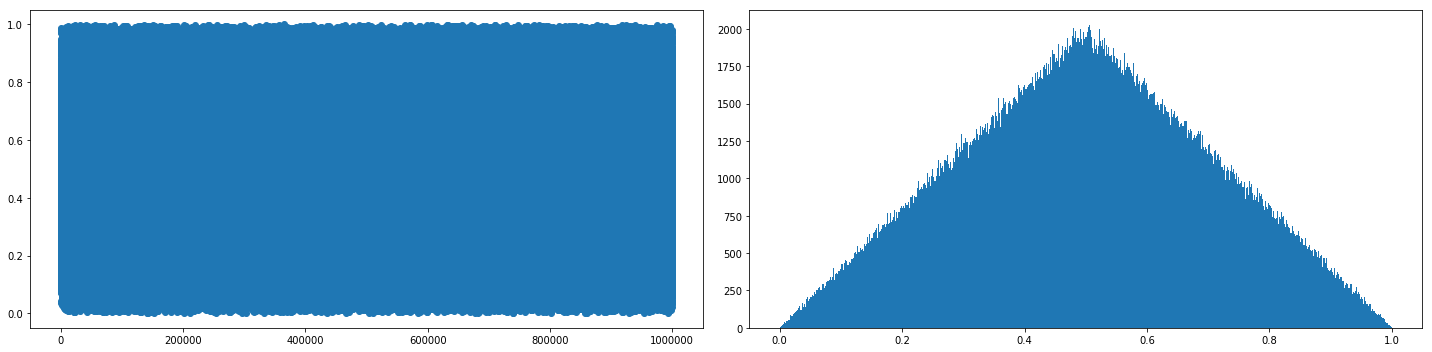

sample size: 5 , mean: 0.49939318019675033 , stddev: 0.12912336041509537 , skewness: 0.0014357822857430356 , kurtosis: -0.23538141768483678


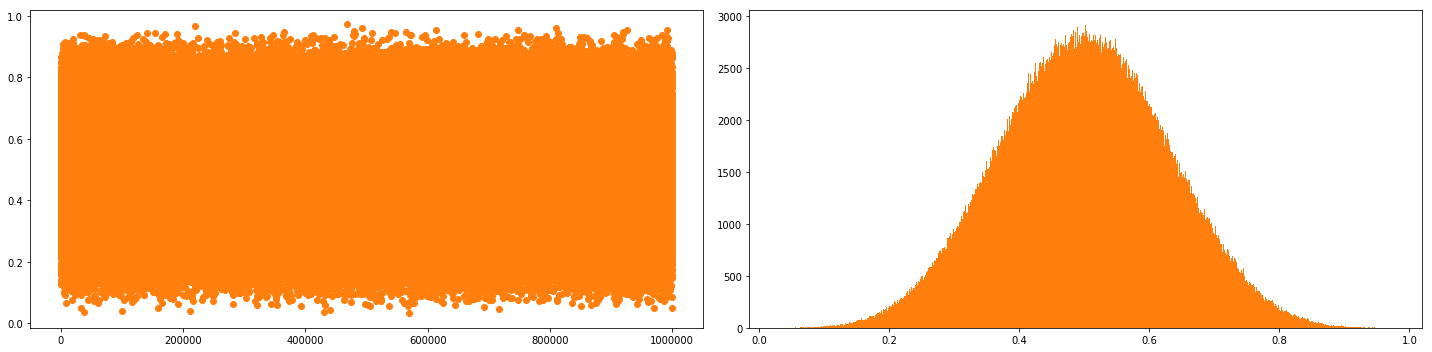

sample size: 15 , mean: 0.4994086221250844 , stddev: 0.07457058798677252 , skewness: -0.0022224694133012855 , kurtosis: -0.07988272473057512


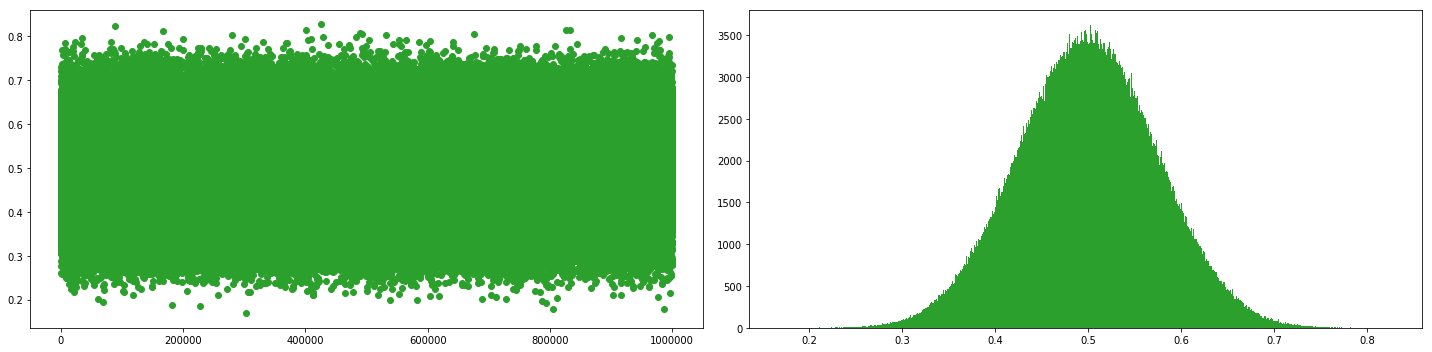

sample size: 30 , mean: 0.4994561773005146 , stddev: 0.05274014212165846 , skewness: 0.00022860048341723699 , kurtosis: -0.03538782622043879


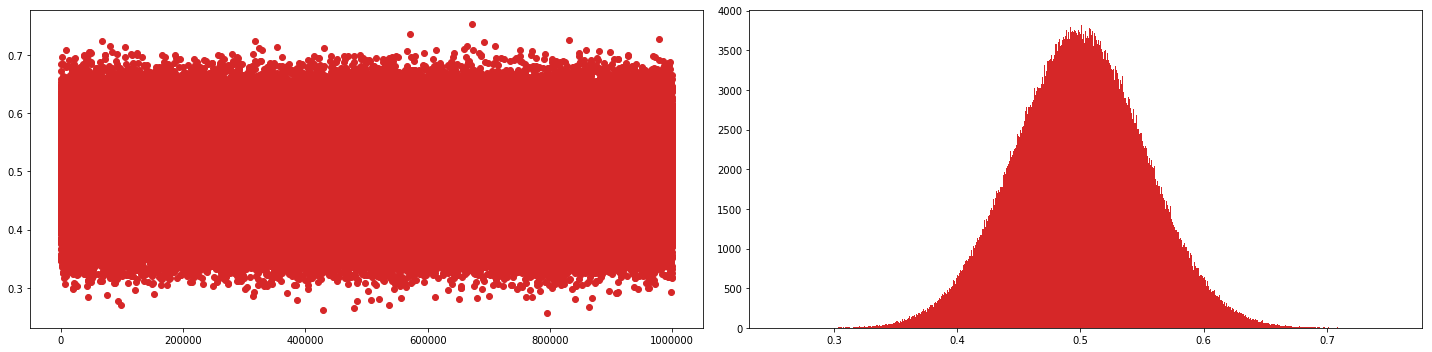

sample size: 100 , mean: 0.4994114383359456 , stddev: 0.02884837233158418 , skewness: 0.00596494375108149 , kurtosis: -0.013329546182240914


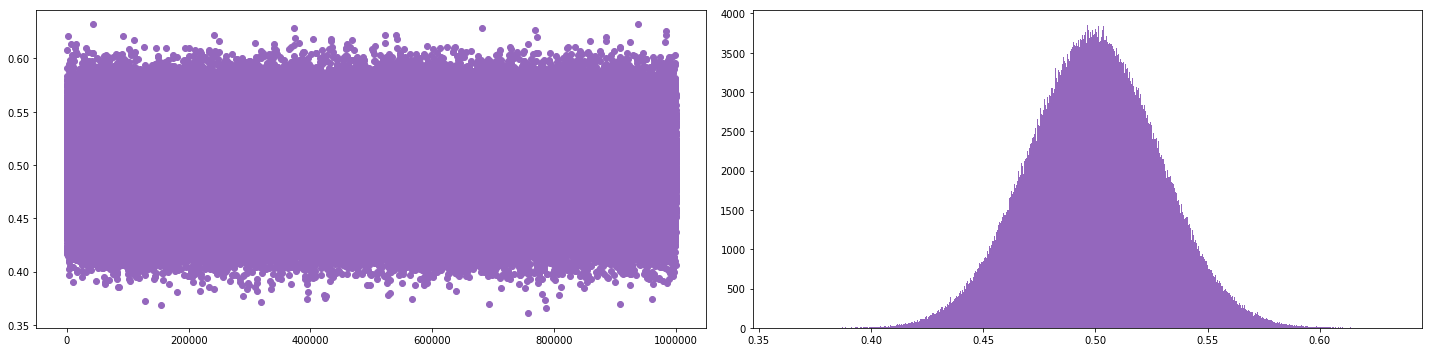

sample size: 1000 , mean: 0.4993681415420002 , stddev: 0.009129669203873998 , skewness: -0.00025180225356450525 , kurtosis: -0.002272853606741343


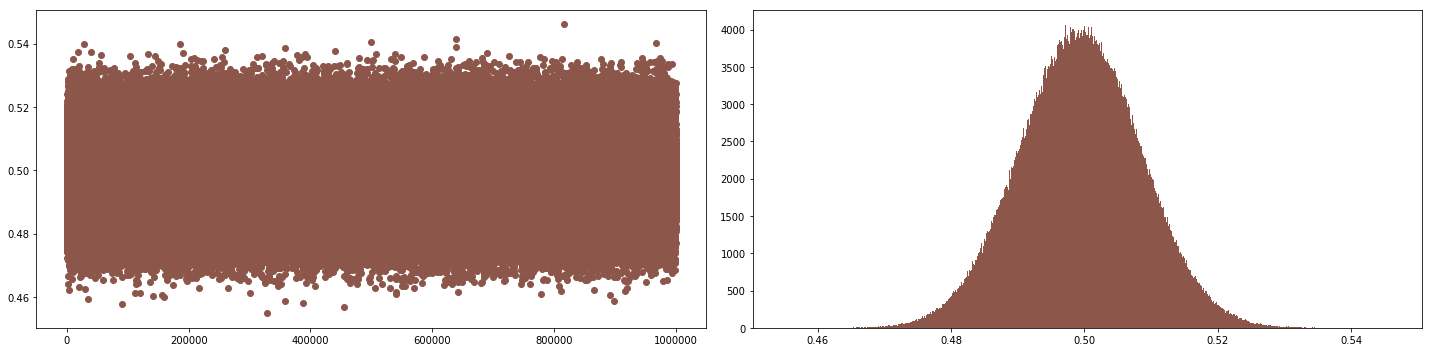

In [5]:
color = 'C'
idx = 0
# elements choice randomly by sample size
for size in [2,5,15,30,100,1000]:
    dataTemp = np.random.choice(data,(ndata, size)).reshape((ndata, size))
    bNormal = False
    if (datatype==3):
        bNormal = True
    drawPlot(data = dataTemp, sample = size, c = 'C'+str(idx), normal = bNormal)
    idx += 1